# Thyroid-Cancer-Risk-Research
Analyzing Thyroid Cancer Risk Among Patient


## Problem Statement:

The dataset provides clinicopathologic features of patients diagnosed with well-differentiated thyroid cancer. These features, such as age, gender, ethnicity, family history, radiation exposure, iodine deficiency, smoking, obesity, diabetes, and various thyroid-related lab results, are critical in determining the recurrence risk of thyroid cancer. The objective is to analyze these features and maybe build a predictive model that can estimate the risk of recurrence of thyroid cancer in these patients based on the given attributes.

### Objectives:

Data Preprocessing: Clean the data by handling missing values, outliers, and transforming variables where needed (e.g., categorical to numeric, creating age bins).

Exploratory Data Analysis (EDA): Explore the relationships between clinicopathologic features and thyroid cancer recurrence risk.

Correlation Analysis: Identify which variables are strongly correlated with recurrence risk, and if some features might not contribute much to prediction.


#### Research Questions:
What is the distribution of recurrence risk across the dataset?

How do different clinicopathologic factors (e.g., age, TSH level, smoking, etc.) correlate with the recurrence of thyroid cancer?

Are there specific features or combinations of features that significantly affect the recurrence risk?

What is the impact of lifestyle factors (smoking, obesity, etc.) on recurrence?

Does family history of thyroid cancer or radiation exposure increase the risk of recurrence?

What is the relationship between thyroid hormone levels (TSH, T3, T4) and recurrence risk?

How well can we predict thyroid cancer recurrence using the given features?

Are there any gender, ethnicity, or age-related trends in recurrence risk?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Data Analysis Projects\Thyroid Cancer Dataset\thyroid_cancer_risk_data.csv")

In [4]:
df.head(5)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [5]:
# Check for missing values
print(df.isnull().sum())

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64


In [31]:
# Statistical analysis of the numerical columns in the dataset

df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


The minimum age of patients in the dataset is 15, the highest is 89. The largest nodule size is 5.0, while the lowest is 0.

### Distribution of Thyroid Cancer Risk

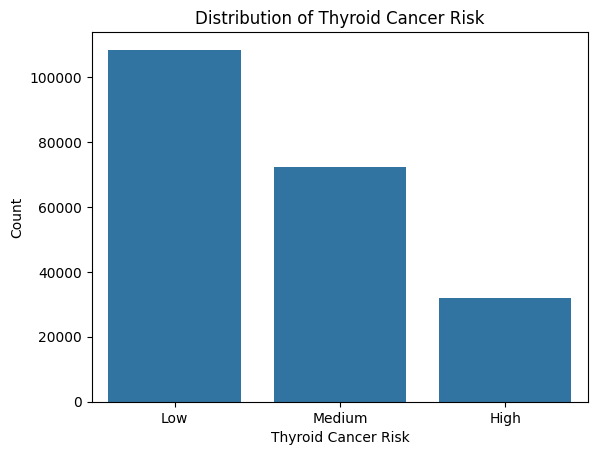

In [33]:
# Plot the distribution of Thyroid Cancer Risk
sns.countplot(x='Thyroid_Cancer_Risk', data=df)
plt.title('Distribution of Thyroid Cancer Risk')
plt.xlabel('Thyroid Cancer Risk')
plt.ylabel('Count')
plt.show()


From the distribution above, most patients have low risk of thyroid cancer. Only few patients are at high risk of the cancer.

### Relationship Between Numerical Features

Exploring how numerical features relate to each other and the target variable.

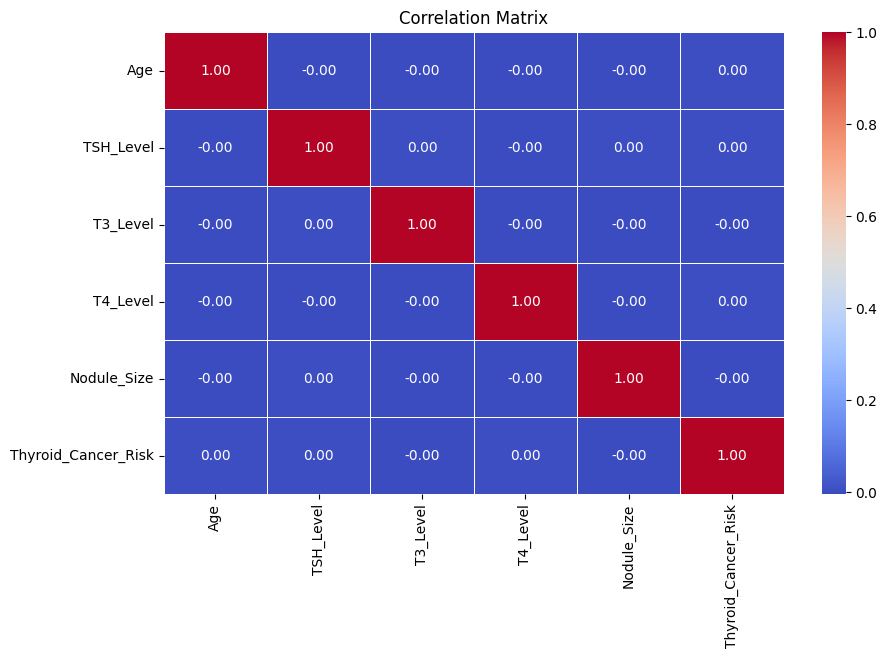

In [ ]:
#converting categorical columns to numeric
df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Correlation matrix between numerical variables
correlation_matrix = df[['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size', 'Thyroid_Cancer_Risk']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot to explore relationships between numerical features and the target variable
sns.pairplot(df, hue="Thyroid_Cancer_Risk", vars=['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size'])
plt.show()



Overall, the correlations between the numerical features and Thyroid_Cancer Risk are very weak.
Most of the correlations between the numerical features themselves are close to 0, indicating little to no linear relationships between them.

### Distribution of Key Numerical Features

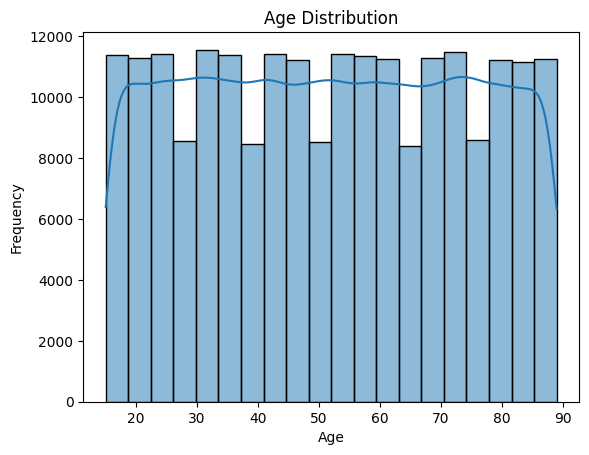

In [9]:
# Histogram of Age
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



The age distribution consist of patients from 18 to 89. Patients from different age groups are present in the dataset.

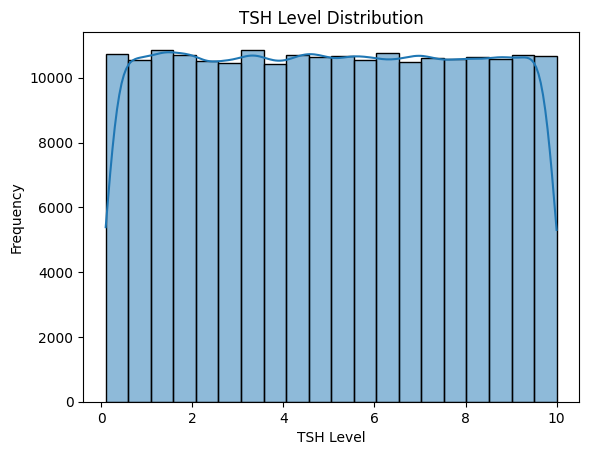

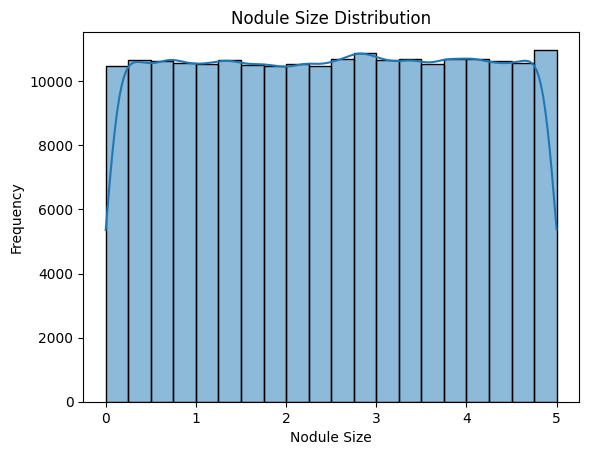

In [7]:
# Histogram of TSH_Level
sns.histplot(df['TSH_Level'], kde=True, bins=20)
plt.title('TSH Level Distribution')
plt.xlabel('TSH Level')
plt.ylabel('Frequency')
plt.show()

# Histogram of Nodule Size
sns.histplot(df['Nodule_Size'], kde=True, bins=20)
plt.title('Nodule Size Distribution')
plt.xlabel('Nodule Size')
plt.ylabel('Frequency')
plt.show()

The distirbution shows most of the patients have  a TSH Level of 0 to 6.0. Most patient also have a Nodule size within the 3-5 range.

### Distribution of Categorical Variables

Visualize how categorical variables (like Gender, Smoking, etc.) relate to the target variable Thyroid_Cancer_Risk.

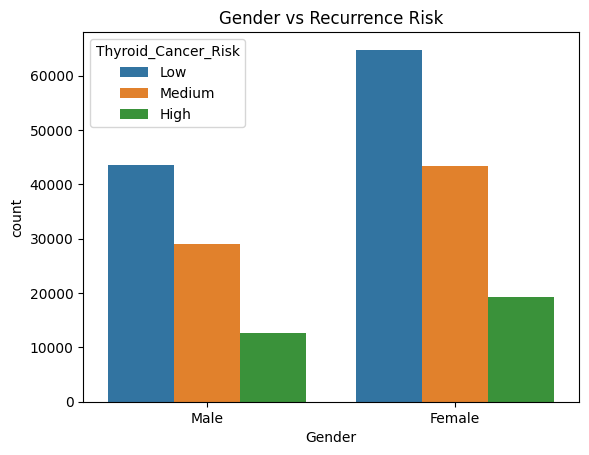

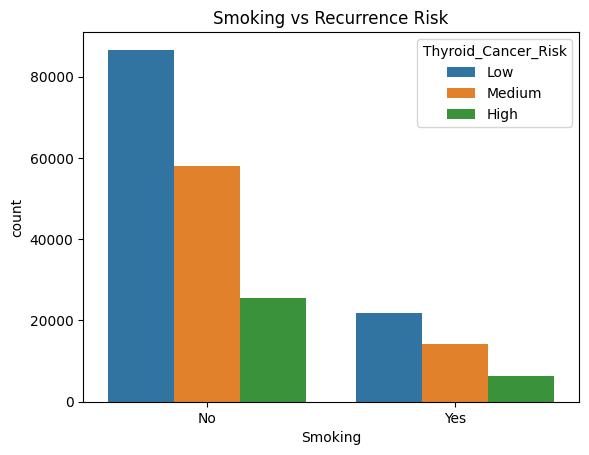

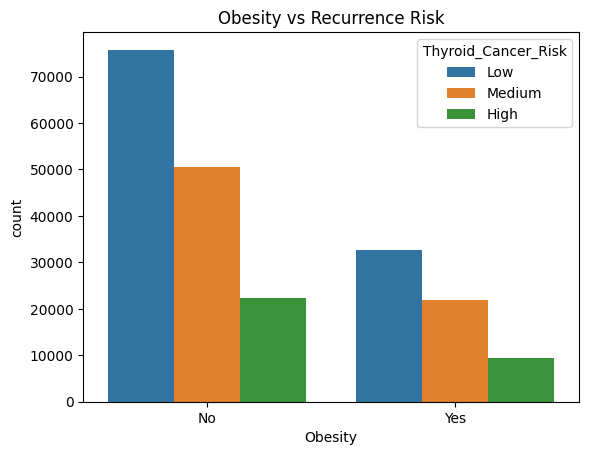

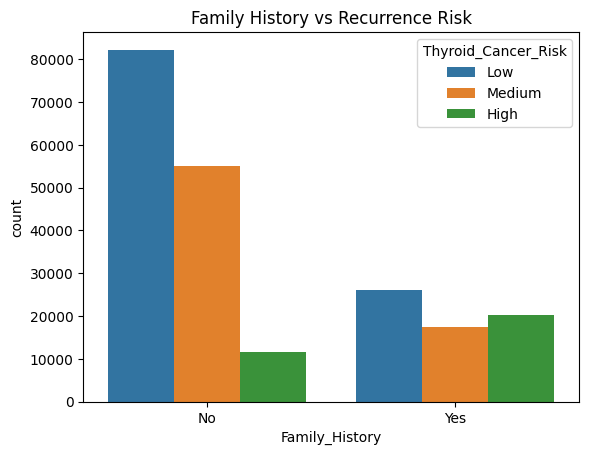

In [10]:
# Countplot for Gender vs Recurrence Risk
sns.countplot(x='Gender', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Gender vs Recurrence Risk')
plt.show()

# Countplot for Smoking vs Recurrence Risk
sns.countplot(x='Smoking', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Smoking vs Recurrence Risk')
plt.show()

# Countplot for Obesity vs Recurrence Risk
sns.countplot(x='Obesity', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Obesity vs Recurrence Risk')
plt.show()

# Countplot for Family History vs Recurrence Risk
sns.countplot(x='Family_History', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Family History vs Recurrence Risk')
plt.show()


From the visuals, the Female Gender had more higher recurrence risk than the Male gender. The female gender also had the highest when it comes to low recurrence risk.

Also, Non-smoker had higher recurrence risk than people who smoke, and patients who are not obesed had higher recurrence risk than those who are actually obesed.
Patients who had a family history of Tyhroid cancer had a high Thyroid cancer risk.


### Numerical Features vs Recurrence Risk

Examine the differences in TSH Level, Age and Nodule Size based on recurrence risk.

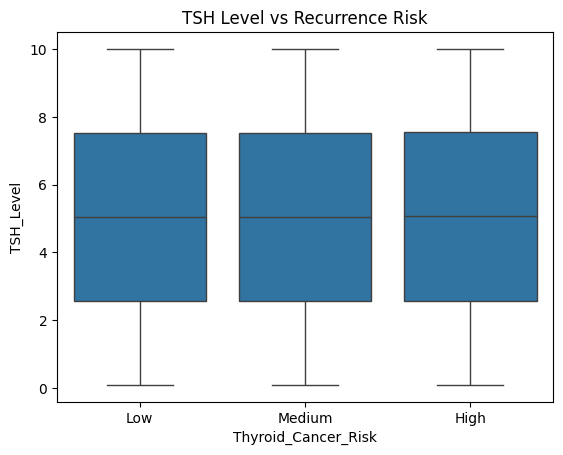

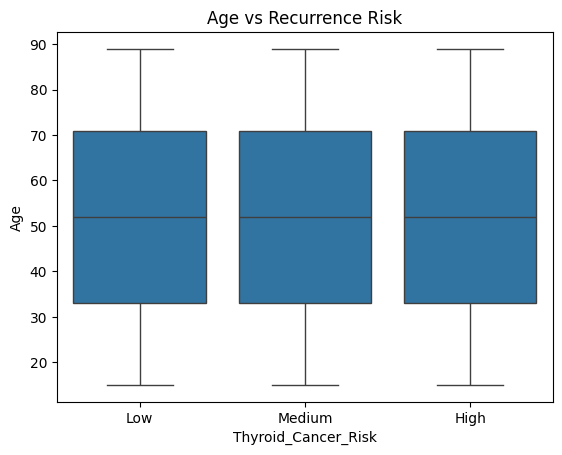

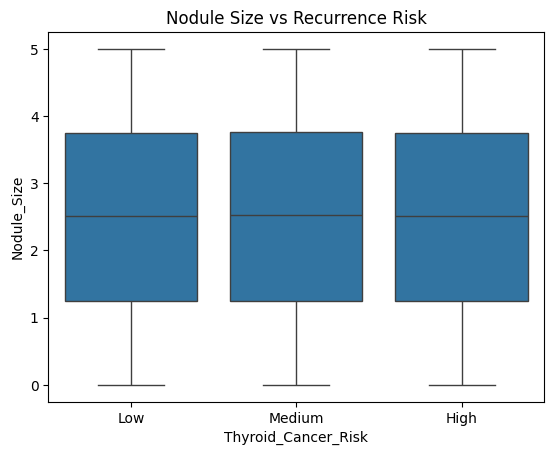

In [19]:
# Boxplot for TSH Level vs Recurrence Risk
sns.boxplot(x='Thyroid_Cancer_Risk', y='TSH_Level', data=df)
plt.title('TSH Level vs Recurrence Risk')
plt.show()

# Boxplot for Age vs Recurrence Risk
sns.boxplot(x='Thyroid_Cancer_Risk', y='Age', data=df)
plt.title('Age vs Recurrence Risk')
plt.show()

# Boxplot for Nodule Size vs Recurrence Risk
sns.boxplot(x='Thyroid_Cancer_Risk', y='Nodule_Size', data=df)
plt.title('Nodule Size vs Recurrence Risk')
plt.show()


### Analyzing the Impact of Age and Gender on Recurrence
Checking how Age and gender correlates with recurrence risk.

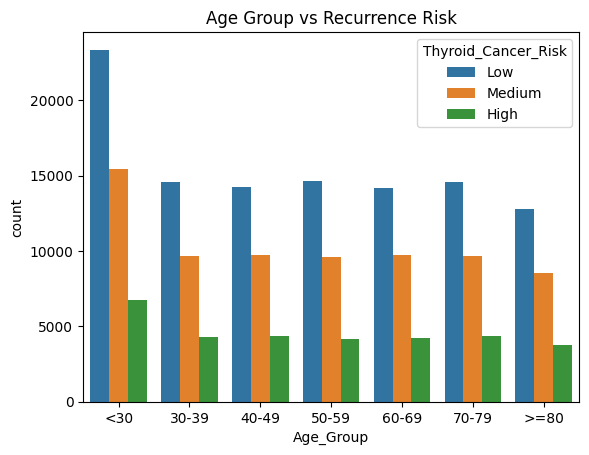

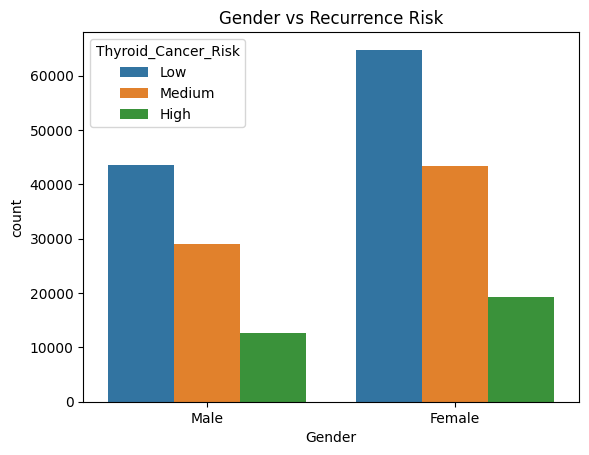

In [24]:
# Age vs Recurrence Risk (binning Age into groups)

bins = [0, 30, 40, 50, 60, 70, 80, 90]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '>=80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.countplot(x='Age_Group', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Age Group vs Recurrence Risk')
plt.show()

# Gender-based analysis
sns.countplot(x='Gender', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Gender vs Recurrence Risk')
plt.show()



From the analysis, Patients from ages 18 to 30 have a higher Thyroid cancer risk than other age groups. The age group 30 to 39 comes second when it comes to higher tyhroid cancer risk.

### Effect of Radiation Exposure on Recurrence Risk

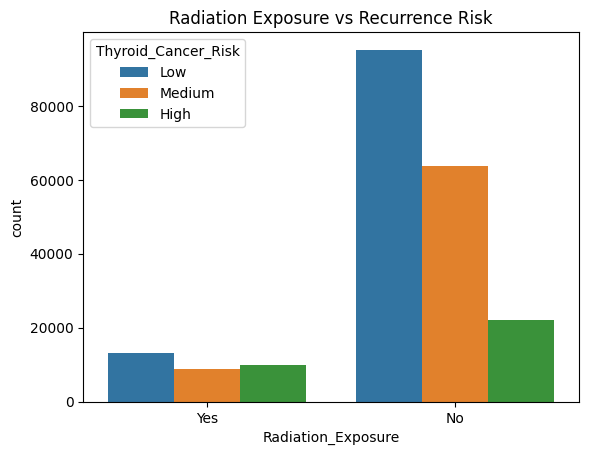

In [26]:
# Radiation Exposure and Recurrence Risk
sns.countplot(x='Radiation_Exposure', hue='Thyroid_Cancer_Risk', data=df)
plt.title('Radiation Exposure vs Recurrence Risk')
plt.show()


Patients who had little or no radiation exposure had a higher recurrence risk than patients who had radiation exposure.

## Findings


1. Statistical Analysis:
Age Range: The age of patients in the dataset ranges from 15 to 89 years, with the minimum age being 15 and the maximum age being 89.
Nodule Size: The size of thyroid nodules varies from 0 to 5.0 mm, with the largest size being 5.0 mm and the smallest size being 0 mm.

3. Distribution of Thyroid Cancer Risk:
From the dataset, it is observed that most patients have a low risk of thyroid cancer. Only a few patients are categorized under high risk for the cancer.


5. Relationship Between Numerical Features:
The correlations between numerical features (Age, TSH Level, T3 Level, T4 Level, Nodule Size) and Thyroid Cancer Risk are generally very weak.
The majority of the correlations between numerical variables are close to 0, suggesting that there are little to no linear relationships between these variables.


7. Distribution of Key Numerical Features:
Age Distribution: The dataset includes patients from various age groups, with ages ranging from 18 to 89 years.


TSH Level: The distribution shows that most patients have a TSH level between 0 and 6.0.

Nodule Size: The majority of patients have a nodule size within the 3-5 mm range.


9. Distribution of Categorical Variables:
Gender: Visuals indicate that females tend to have higher recurrence risks for thyroid cancer compared to males. Additionally, females have a higher proportion of low recurrence risk.

Smoking: Non-smokers tend to have a higher recurrence risk compared to those who smoke.

Obesity: Non-obese patients have a higher recurrence risk than obese individuals.

Family History: Patients who have a family history of thyroid cancer show a higher risk of developing thyroid cancer.

11. Analyzing the Impact of Age and Gender on Recurrence:
Age: From the analysis, patients in the 18-30 age group have a higher thyroid cancer risk compared to other age groups. The 30-39 age group follows as the second highest risk group for thyroid cancer.

13. Correlation Between Lifestyle Factors (Smoking, Obesity, etc.) and Recurrence:
Lifestyle Factors such as smoking and obesity seem to play a role in the recurrence risk for thyroid cancer, with non-smokers and non-obese individuals showing higher recurrence risk.


15. Effect of Radiation Exposure on Recurrence Risk:
Radiation exposure is inversely correlated with recurrence risk, as patients with little or no radiation exposure have a higher recurrence risk compared to those who have been exposed to radiation.




## Conclusion:

Age and Gender: Gender appears to influence recurrence risk, with females showing a higher recurrence rate, while younger patients (18-30 years) also exhibit a higher risk. This suggests that age and gender are potential factors to monitor when assessing thyroid cancer risk.

Numerical Features: The correlation between numerical features like Age, TSH Level, and Nodule Size with Thyroid Cancer Risk is weak, indicating that these features alone might not be strong predictors of recurrence.

Lifestyle Factors: Lifestyle factors such as smoking, obesity, and family history show notable relationships with recurrence risk. Non-smokers and non-obese patients show higher risk, highlighting the potential role of lifestyle in the disease’s progression.

Radiation Exposure: Patients who have no or limited radiation exposure have a higher recurrence risk, suggesting that radiation exposure may be protective or that these patients are under different treatment protocols.


## Recommendations:
Further Analysis of Risk Factors:

Since age, gender, and family history show some correlation with thyroid cancer recurrence, these variables should be considered in further predictive models.

Additional data such as lifestyle factors (diet, exercise) and genetic markers should be incorporated to improve the model's predictive accuracy.

Targeted Monitoring:

Focus on young adults (18-30 years) and females, as they show a higher risk for thyroid cancer recurrence. Monitoring these groups more closely could potentially improve early detection and intervention.

Promote Healthy Lifestyles:

Given the relationship between smoking, obesity, and higher recurrence risk, there should be efforts to educate patients about lifestyle modifications (e.g., smoking, weight management) that may help reduce recurrence risks.

Radiation Exposure:
While radiation exposure is inversely correlated with recurrence risk, it’s essential to evaluate the long-term effects of radiation treatment and explore alternative therapies for those with no radiation exposure.

Use of More Sophisticated Models:

Given the weak correlations observed between the numerical features and thyroid cancer risk, advanced statistical techniques such as machine learning models (e.g., logistic regression, decision trees) should be considered to uncover more complex patterns in the data.
Clinical Application:

Physicians and healthcare providers should take into account not only the clinical and biological factors but also lifestyle choices and family history when assessing the recurrence risk of thyroid cancer in patients.